In [102]:
import pandas as pd
import numpy as np

In [281]:

# plotly standard imports
import plotly.graph_objects as go

from datetime import datetime
from sklearn.metrics import mean_squared_error

In [282]:
# Cufflinks wrapper on plotly
import cufflinks
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

from plotly.offline import iplot
cufflinks.go_offline()

# Set global theme
cufflinks.set_config_file(world_readable=True, theme='pearl')
import plotly.figure_factory as ff

In [486]:
file="2018_Monthly_ENG.csv"
df=pd.read_csv(file, sep=";", encoding="latin1")

In [487]:
year="2018"
col_macro="Macroeconomic data  average:"
col_macro=col_macro+year

In [488]:
col_macro

'Macroeconomic data \x96 average:2018'

In [489]:
df.rename(columns={col_macro:"Features"}, inplace=True)

In [490]:
df.rename(columns={'January':"1", 'February':"2", 'March':"3", 'April':"4", 'May':"5", 'June':"6",
       'July':"7", 'August':"8", 'September':"9", 'October':"10", 'November':"11", 'December':"12"}, inplace=True)

In [491]:
df.columns[-12:]

Index(['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12'], dtype='object')

In [492]:
df=pd.melt(df,id_vars=['Features'], value_vars=df.columns[-12:])

In [493]:
df.head(5)

,Features,variable,value
0,Brent crude oil price,1,69.2
1,Model downstream margin,1,9.9
2,Model refining margin + Brent/URAL differential,1,4.4
3,of which: Brent/URAL differential,1,0.6
4,Model petrochemical margin,1,872.0


In [494]:
df.variable=df.variable.apply(lambda x: int(x))

In [495]:
df=df.pivot(index="variable", columns="Features")
df.reset_index(inplace=True)

df.rename(columns={"":"month"}, inplace=True)

In [496]:
df.head()

variable                 value                                  \
Features    month Brent crude oil price EUR/PLN Model downstream margin   
0               1                  69.2    4.16                     9.9   
1               2                  65.2    4.17                    12.0   
2               3                  65.9    4.21                    12.4   
3               4                  71.8    4.19                    12.7   
4               5                  76.9    4.28                    12.0   

                                     \
Features Model petrochemical margin   
0                             872.0   
1                             925.0   
2                             908.0   
3                             864.0   
4                             809.0   

                                                                  \
Features Model refining margin + Brent/URAL differential USD/PLN   
0                                                    4.4    3.41   
1                                                    6.0    3.37   
2                                                    6.7    3.41   
3                                                    7.7    3.42   
4                                                    7.4    3.62   

                                            
Features of which: Brent/URAL differential  
0                                      0.6  
1                                      1.9  
2                                      2.4  
3                                      3.0  
4                                      2.1

In [497]:
df.columns

MultiIndex(levels=[['value', 'variable'], ['Brent crude oil price', 'EUR/PLN', 'Model downstream margin', 'Model petrochemical margin', 'Model refining margin + Brent/URAL differential', 'USD/PLN', 'month', 'of which: Brent/URAL differential']],
           codes=[[1, 0, 0, 0, 0, 0, 0, 0], [6, 0, 1, 2, 3, 4, 5, 7]],
           names=[None, 'Features'])

In [498]:
df.columns=df.columns.droplevel()

In [499]:
df.columns

Index(['month', 'Brent crude oil price', 'EUR/PLN', 'Model downstream margin',
       'Model petrochemical margin',
       'Model refining margin + Brent/URAL differential', 'USD/PLN',
       'of which: Brent/URAL differential'],
      dtype='object', name='Features')

In [500]:
df["year"]=2018

In [501]:
df.head()

Features,month,Brent crude oil price,EUR/PLN,Model downstream margin,Model petrochemical margin,Model refining margin + Brent/URAL differential,USD/PLN,of which: Brent/URAL differential,year
0,1,69.2,4.16,9.9,872.0,4.4,3.41,0.6,2018
1,2,65.2,4.17,12.0,925.0,6.0,3.37,1.9,2018
2,3,65.9,4.21,12.4,908.0,6.7,3.41,2.4,2018
3,4,71.8,4.19,12.7,864.0,7.7,3.42,3.0,2018
4,5,76.9,4.28,12.0,809.0,7.4,3.62,2.1,2018


In [502]:
def ETL(year):
    file=str(year)
    file=file+"_Monthly_ENG.csv"
    df=pd.read_csv(file, sep=";", encoding="latin1")
    
    col_macro="Macroeconomic data  average:"
    col_macro=col_macro+str(year)
    
    df.rename(columns={col_macro:"Features"}, inplace=True)
    df.rename(columns={'January':"1", 'February':"2", 'March':"3", 'April':"4", 'May':"5", 'June':"6",
       'July':"7", 'August':"8", 'September':"9", 'October':"10", 'November':"11", 'December':"12"}, inplace=True)
    
    df=pd.melt(df,id_vars=['Features'], value_vars=df.columns[-12:])
    df.variable=df.variable.apply(lambda x: int(x))
    
    df=df.pivot(index="variable", columns="Features")
    df.reset_index(inplace=True)
    df.rename(columns={"":"month"}, inplace=True)
        
    df.columns=df.columns.droplevel()
    df["year"]=year

    return(df)
    

In [503]:
for year in range(2014, 2019):
    if year==2014:
        df=ETL(year)
    else:
        df_temp=ETL(year)
        df=pd.concat([df, df_temp])

    

In [504]:
df=df.reset_index()
df.drop(columns=["index"], inplace=True)

In [505]:
df.rename(columns={'Brent crude oil price':"BRENT",
       'of which: Brent/URAL differential':"BRENT/URAL DIFF"}, inplace=True
)

In [506]:
df["Adjusted_refining_margin"]=df["Model refining margin + Brent/URAL differential"]-df["BRENT/URAL DIFF"]

In [507]:
df

Features,month,BRENT,EUR/PLN,Model downstream margin,Model petrochemical margin,Model refining margin + Brent/URAL differential,USD/PLN,BRENT/URAL DIFF,year,Adjusted_refining_margin
0,1,108.3,4.18,9.0,762.0,1.7,3.07,1.8,2014,-0.1
1,2,108.9,4.18,10.0,753.0,3.2,3.06,1.5,2014,1.7
2,3,107.6,4.20,9.5,751.0,3.1,3.04,0.8,2014,2.3
3,4,107.6,4.19,11.6,746.0,5.7,3.03,1.4,2014,4.3
4,5,109.6,4.18,9.5,740.0,3.5,3.04,2.0,2014,1.5
5,6,111.7,4.14,10.3,736.0,4.8,3.04,3.2,2014,1.6
6,7,106.6,4.15,12.4,782.0,6.1,3.06,2.1,2014,4.0
7,8,101.6,4.19,13.2,807.0,6.5,3.15,1.5,2014,5.0
8,9,97.3,4.19,13.1,750.0,7.2,3.25,1.7,2014,5.5
9,10,87.4,4.21,12.7,835.0,6.1,3.32,1.3,2014,4.8


In [508]:

trace0=go.Scatter(
        y=df.Adjusted_refining_margin,
        x=df.BRENT,
        mode='markers',
        marker=dict(
        color="blue",
        size=10,
        opacity=0.2
        )
    )




data=[trace0]
figure=go.Figure(
    data=data,
    layout=go.Layout(
        title="Adjusted refinery return vs BRENT",
        xaxis=dict(title="BRENT $/barrel"),
        yaxis=dict(title="Refinery margins %/barrel"),

    
    ))
iplot(figure)

In [509]:

trace0=go.Scatter(
        y=df.Adjusted_refining_margin,
        x=df["USD/PLN"],
        mode='markers',
        marker=dict(
        color="blue",
        size=10,
        opacity=0.2
        )
    )




data=[trace0]
figure=go.Figure(
    data=data,
    layout=go.Layout(
        title="Adjusted refinery return vs USD/PLN",
        xaxis=dict(title="BRENT $/barrel"),
        yaxis=dict(title="Refinery margins %/barrel"),

    
    ))
iplot(figure)

In [510]:

trace0=go.Scatter(
        y=df.Adjusted_refining_margin,
        x=df["EUR/PLN"],
        mode='markers',
        marker=dict(
        color="blue",
        size=10,
        opacity=0.2
        )
    )




data=[trace0]
figure=go.Figure(
    data=data,
    layout=go.Layout(
        title="Adjusted refinery return vs EUR/PLN",
        xaxis=dict(title="BRENT $/barrel"),
        yaxis=dict(title="Refinery margins %/barrel"),

    
    ))
iplot(figure)

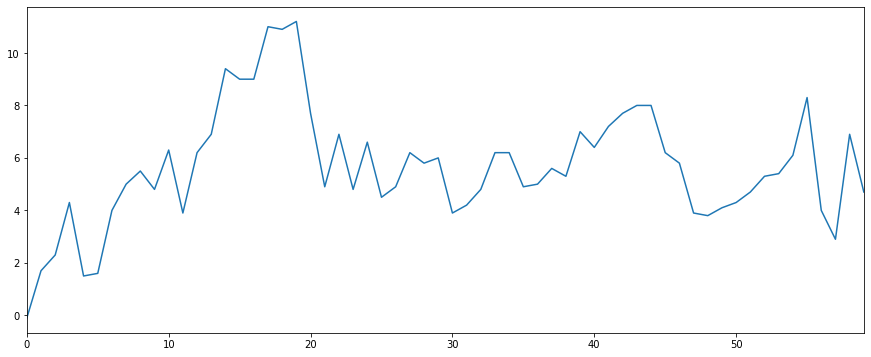

In [511]:
df.Adjusted_refining_margin.plot(figsize=(15,6))

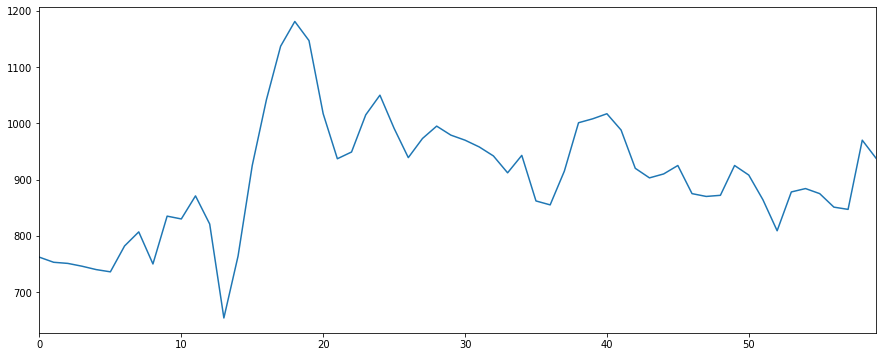

In [512]:
df["Model petrochemical margin"].plot(figsize=(15,6))

In [513]:
trace0=go.Scatter3d(
        x=df.BRENT,
        y=df["USD/PLN"],
        z=df.Adjusted_refining_margin,
        mode='markers',
        marker=dict(
       
        colorscale="Jet",
        color=df.year,
        showscale=True,
        size=8,
        opacity=1
        )
    )

data=[trace0]

figure=go.Figure(
    data=data,
    layout=go.Layout(
        scene=dict(
            xaxis=dict(title="Share of DJIA"),
            yaxis=dict(title="Share of SP500"),
            zaxis=dict(title="Porfolio variation")
           
                  ),
         title="Variation and mean return in relation to Portfolio hedging"
    ))
iplot(figure)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001676FA240B8>,
      dtype=object)

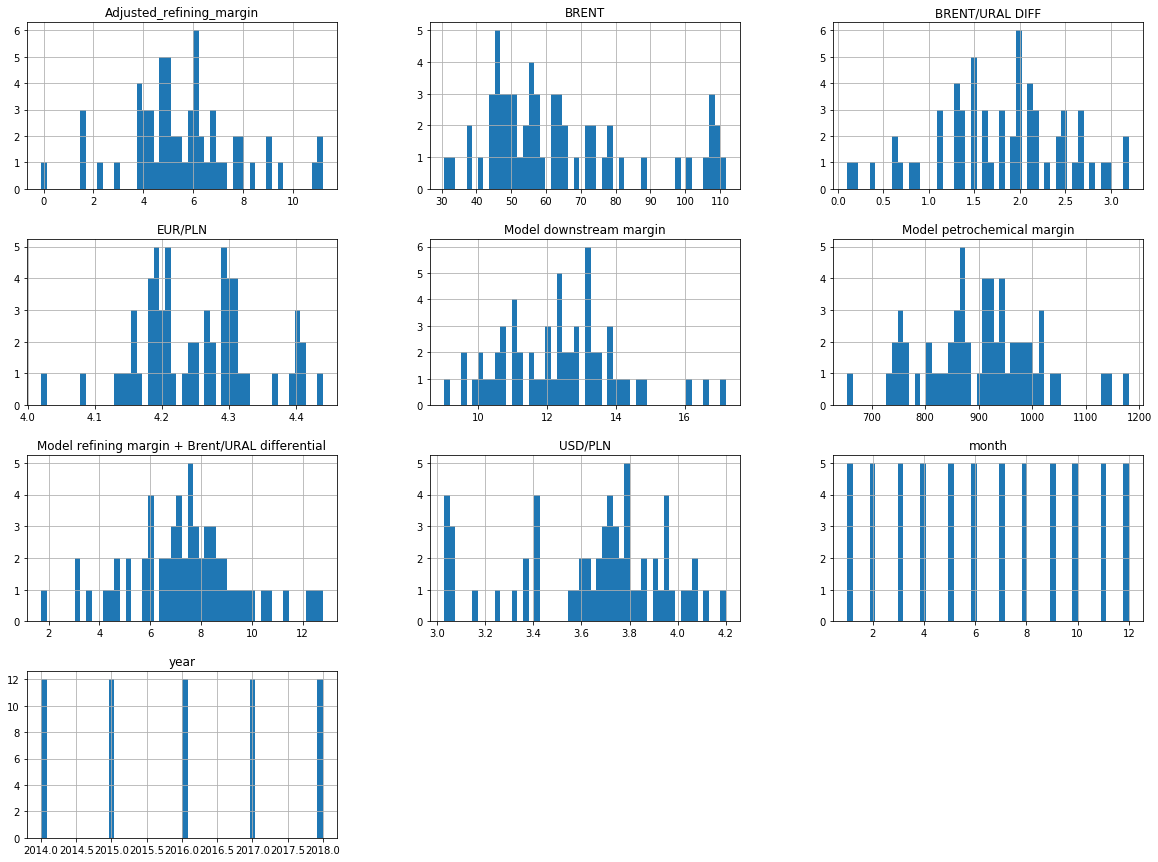

In [514]:
%matplotlib inline
import matplotlib.pyplot as plt
df.hist(bins=50, figsize=(20,15))
plt.show()

In [515]:
df.columns

Index(['month', 'BRENT', 'EUR/PLN', 'Model downstream margin',
       'Model petrochemical margin',
       'Model refining margin + Brent/URAL differential', 'USD/PLN',
       'BRENT/URAL DIFF', 'year', 'Adjusted_refining_margin'],
      dtype='object', name='Features')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001676A3B6B70>,
      dtype=object)

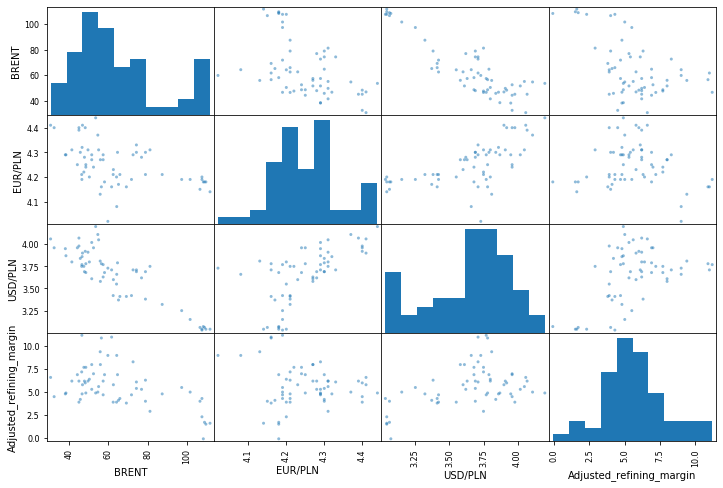

In [516]:
attributes=['BRENT', 'EUR/PLN','USD/PLN','Adjusted_refining_margin']
from pandas.plotting import scatter_matrix

scatter_matrix(df[attributes], figsize=(12, 8))

In [517]:
df.head()

Features,month,BRENT,EUR/PLN,Model downstream margin,Model petrochemical margin,Model refining margin + Brent/URAL differential,USD/PLN,BRENT/URAL DIFF,year,Adjusted_refining_margin
0,1,108.3,4.18,9.0,762.0,1.7,3.07,1.8,2014,-0.1
1,2,108.9,4.18,10.0,753.0,3.2,3.06,1.5,2014,1.7
2,3,107.6,4.20,9.5,751.0,3.1,3.04,0.8,2014,2.3
3,4,107.6,4.19,11.6,746.0,5.7,3.03,1.4,2014,4.3
4,5,109.6,4.18,9.5,740.0,3.5,3.04,2.0,2014,1.5


In [571]:
X=df[['BRENT', 'EUR/PLN','USD/PLN']]

In [572]:
y=df["Model petrochemical margin"]


In [573]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [574]:
lin_reg.score(X,y)

0.5074988798269464

In [575]:

from sklearn.metrics import mean_squared_error

y_hat=lin_reg.predict(X)
lin_mse = mean_squared_error(y, y_hat)
lin_rmse=np.sqrt(lin_mse)
lin_rmse

73.83706585377615

In [576]:
y.mean()

904.55

In [577]:
lin_reg.intercept_

1959.7649512190335

In [578]:
lin_reg.coef_

array([  -2.94726458, -270.11928624,   77.17279323])

In [579]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=60)

In [580]:

lin_reg = LinearRegression(normalize=True)

In [581]:
lin_reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [582]:
lin_reg.score(X_train,y_train)

0.4999242454348514

In [583]:
lin_reg.score(X_test,y_test)

0.519389906694516

In [584]:
y_hat=lin_reg.predict(X_test)
lin_mse = mean_squared_error(y_test, y_hat)
lin_rmse=np.sqrt(lin_mse)
lin_rmse

71.98908701201393

In [585]:
lin_rmse/y_test.mean()

0.07861216162928084

In [586]:
df.columns

Index(['month', 'BRENT', 'EUR/PLN', 'Model downstream margin',
       'Model petrochemical margin',
       'Model refining margin + Brent/URAL differential', 'USD/PLN',
       'BRENT/URAL DIFF', 'year', 'Adjusted_refining_margin'],
      dtype='object', name='Features')

In [587]:
df_excel=df[["year","month",'BRENT', 'EUR/PLN','USD/PLN','Model petrochemical margin']]

In [588]:
df_excel.to_excel("Petrochemican_margin_v2.xlsx")

# Petrochemical margins

In [538]:

trace0=go.Scatter(
        y=df["Model petrochemical margin"],
        x=df.BRENT,
        mode='markers',
        marker=dict(
        color="blue",
        size=10,
        opacity=0.2
        )
    )




data=[trace0]
figure=go.Figure(
    data=data,
    layout=go.Layout(
        title="Adjusted refinery return vs BRENT",
        xaxis=dict(title="BRENT $/barrel"),
        yaxis=dict(title="Refinery margins %/barrel"),

    
    ))
iplot(figure)

In [539]:

trace0=go.Scatter(
        y=df["Model petrochemical margin"],
        x=df["USD/PLN"],
        mode='markers',
        marker=dict(
        color="blue",
        size=10,
        opacity=0.2
        )
    )




data=[trace0]
figure=go.Figure(
    data=data,
    layout=go.Layout(
        title="Adjusted refinery return vs BRENT",
        xaxis=dict(title="BRENT $/barrel"),
        yaxis=dict(title="Refinery margins %/barrel"),

    
    ))
iplot(figure)

In [540]:

trace0=go.Scatter(
        y=df["Model petrochemical margin"],
        x=df["EUR/PLN"],
        mode='markers',
        marker=dict(
        color="blue",
        size=10,
        opacity=0.2
        )
    )




data=[trace0]
figure=go.Figure(
    data=data,
    layout=go.Layout(
        title="Adjusted refinery return vs BRENT",
        xaxis=dict(title="BRENT $/barrel"),
        yaxis=dict(title="Refinery margins %/barrel"),

    
    ))
iplot(figure)

In [541]:

trace0=go.Scatter(
        y=df["Model petrochemical margin"],
        x=df['BRENT/URAL DIFF'],
        mode='markers',
        marker=dict(
        color="blue",
        size=10,
        opacity=0.2
        )
    )




data=[trace0]
figure=go.Figure(
    data=data,
    layout=go.Layout(
        title="Adjusted refinery return vs BRENT",
        xaxis=dict(title="BRENT $/barrel"),
        yaxis=dict(title="Refinery margins %/barrel"),

    
    ))
iplot(figure)